In [1]:

install.packages("HiddenMarkov")
library(HiddenMarkov)





Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# Proceso simulado


Datos del proceso simulado

\begin{equation}
Pi=\begin{bmatrix}
0.7 & 0.3\\ 
 0.1& 0.9
\end{bmatrix}
\end{equation}

\begin{equation}
\delta = \begin{Bmatrix}
0.7 & 0.3  
\end{Bmatrix}
\end{equation}

\begin{equation}
b_1 = N(4,1)
\end{equation}

\begin{equation}
b_2 = N(0,0.5)
\end{equation}

Simulación:

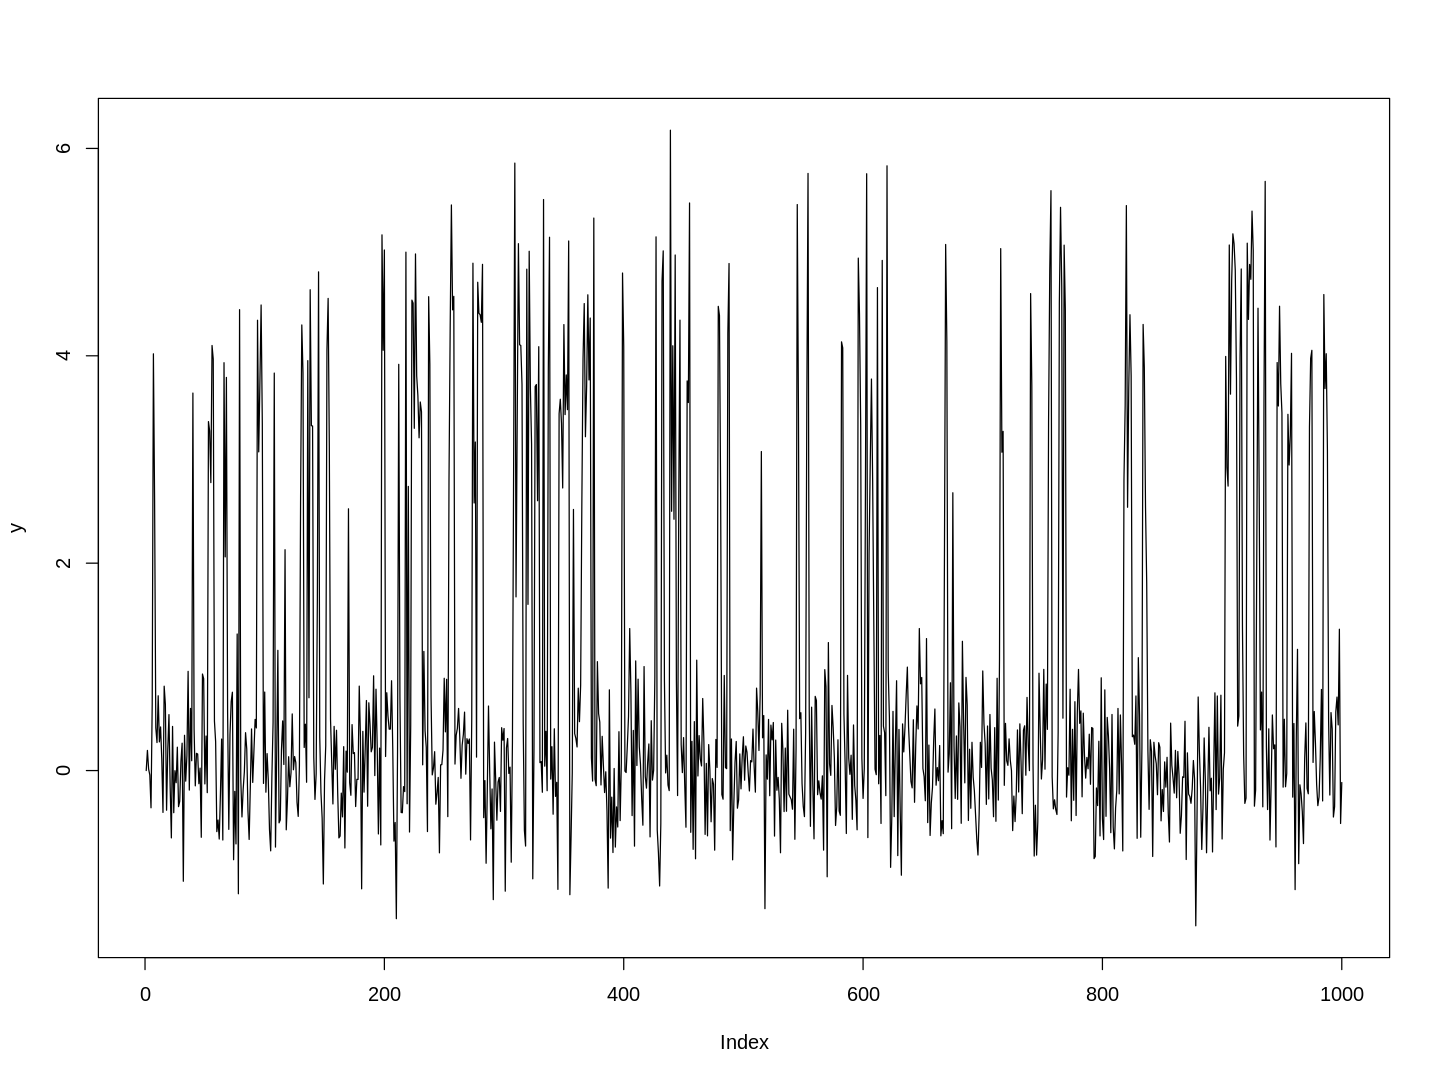

In [2]:
P<- matrix(c(0.7, 0.3, 0.1, 0.9), byrow = TRUE, ncol=2)
b<- matrix(c(4,1,0,0.5), byrow = TRUE, ncol=2 )
PI<-c(0.7,0.3)

N=1000

S=c(1,2)
x=rep(0, times=N)
y=rep(0, times=N)

x[1]<- sample(S, 1, prob = PI)
for (i in 2:N) {
    x[i]<- sample(S, 1, prob = P[x[i-1],])
    y[i]<- rnorm(1, mean = b[x[i],1], sd = b[x[i],2])
}

options(repr.plot.width=12, repr.plot.height=9) #ajusta tamaño de graficas
plot(y, type="l")

Para estimar el proceso simulado hay que crear un objeto del tipo `dthmm` para comenzar la iteración:

In [3]:
matrizP<- function(viterbi, estados) #x es el resultado de aplicar la funcion Viterbi
{
  estPi <- table(viterbi[-length(x)], viterbi[-1])
  rowtotal <- estPi %*% matrix(1, nrow=estados, ncol=1)
  estPi <- diag(as.vector(1/rowtotal)) %*% estPi
  estPi  
  
}


In [4]:

# Creo primer aproximacion al modelo usando la funcion dthmm
hmm<- dthmm(y, Pi=matrix(c(0.2,0.3,0.4,0.5), nrow=2), delta=c(0.5,0.5), distn="norm", pm= list(mean=c(1, 0), sd=c(0.5, 0.1)))




In [5]:
e=2
while (e>0.01)
{
  lL_ini<- logLik(hmm)
  viterbi<- Viterbi(hmm)
  MEAN<- c(mean(y[viterbi==1]), mean(y[viterbi==2]))
  SD<- c(sd(y[viterbi==1]), sd(y[viterbi==2]))
  P<- matrizP(viterbi, 2)
  delta<- c(0,0)
  delta[viterbi[1]]<-1
  hmm<- dthmm(y, Pi=P, delta=delta, distn="norm", pm= list(mean=MEAN, sd=SD))
  e<- abs(lL_ini-logLik(hmm))
}

print(paste0("b1: MEAN1=", MEAN[1], " SD1=", SD[1]))
print(paste0("b2: MEAN2=", MEAN[2], " SD2=", SD[2]))
print(P)

[1] "b1: MEAN1=3.95256115020526 SD1=0.945178113208802"
[1] "b2: MEAN2=0.0277975472925326 SD2=0.49542825801335"
      
                1         2
  [1,] 0.67149758 0.3285024
  [2,] 0.08585859 0.9141414
